In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.patches import Circle

import glob
from astropy.io import fits
from matplotlib.colors import LogNorm

from photutils.background import (Background2D, MedianBackground)  # For estimating the background
from photutils.background import BkgZoomInterpolator               # For interpolating the background
from astropy import stats as astrostats

import gc

In [2]:
# Path to the FITS files
file_path = ['g_filter_science.fit','r_filter_science.fit' ,'i_filter_science.fit'] 

In [3]:
# Open the FITS file

filters = []

for f_p in file_path:
    
    with fits.open(f_p) as hdul:
        #hdul.info()                        # Display information about the FITS file content
        #i_filter_header = hdul[0].header
        filters.append(hdul[0].data)   # Access the primary data (assuming image is in the primary HDU)

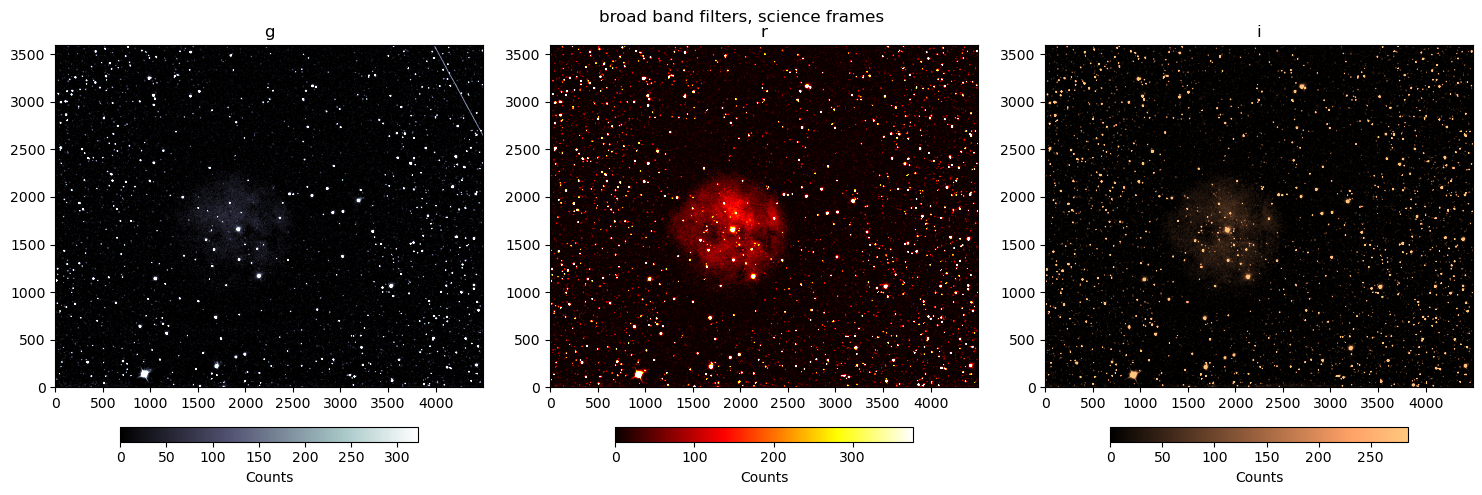

In [5]:

fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("broad band filters, science frames")

cmaps = ['bone','hot','copper']
title = ['g','r','i']

for i in range(3):
    
    im = ax[i].imshow(filters[i], clim=[0,np.quantile(filters[i], 0.99)], cmap=cmaps[i], origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
    plt.colorbar(im, ax=ax[i], location='bottom', fraction=0.0375, pad=0.1, label="Counts")  # Make sure to use the `im` object for colorbar
    ax[i].set_title(title[i])
    #ax[i].set(xlabel="X Pixel",ylabel="Y Pixel")

#plt.subplots_adjust(bottom=0.15) 
plt.tight_layout()
plt.show()

## Dithering

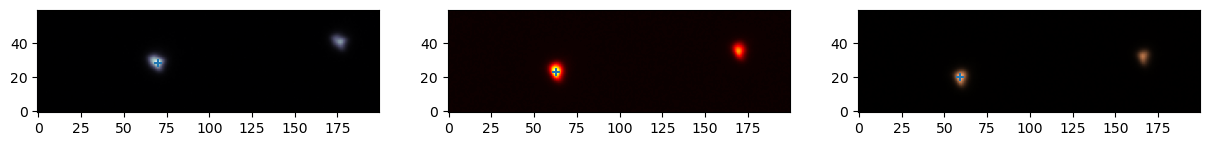

In [6]:
# define rectangle for photutils
# does NOT account for rotation

from photutils.centroids import centroid_quadratic

fig, ax = plt.subplots(1,3,figsize=(15, 5)) #figsize=(15,5)

x_sx = 2850
x_dx = 3050
y_sx = 1800
y_dx = 1860

star_centroid = []

for i in range(3):
    
    rectangle = filters[i][y_sx:y_dx,x_sx:x_dx]
    
    star_centroid.append(centroid_quadratic(rectangle)) #fit_boxsize=11, search_boxsize=51
    #clim=[0,np.quantile(rectangle, [0.99])],
    im = ax[i].imshow(rectangle, cmap=cmaps[i], origin='lower',aspect='equal')  # Use clim to scale the image based on the 1st and 99th quantiles
    #plt.colorbar(im, ax=ax[i], location='bottom', fraction=0.0375, pad=0.1, label="Counts")  # Make sure to use the `im` object for colorbar
    #????
    ax[i].scatter(star_centroid[i][0],star_centroid[i][1],marker='+')
    #ax[i].set(xlabel="X Pixel",ylabel="Y Pixel")


In [7]:
print(star_centroid)
offsets = (star_centroid[0]-star_centroid).astype(int) # refered to first exposure 
print(offsets)

[array([69.79865428, 28.55434207]), array([62.57600745, 23.22313912]), array([59.32678427, 20.00623509])]
[[ 0  0]
 [ 7  5]
 [10  8]]


In [8]:
filters_aligned = []

for i in range(3):
    filters_aligned.append(np.roll(filters[i], (offsets[i, 0], offsets[i, 1]), axis=(0, 1)))

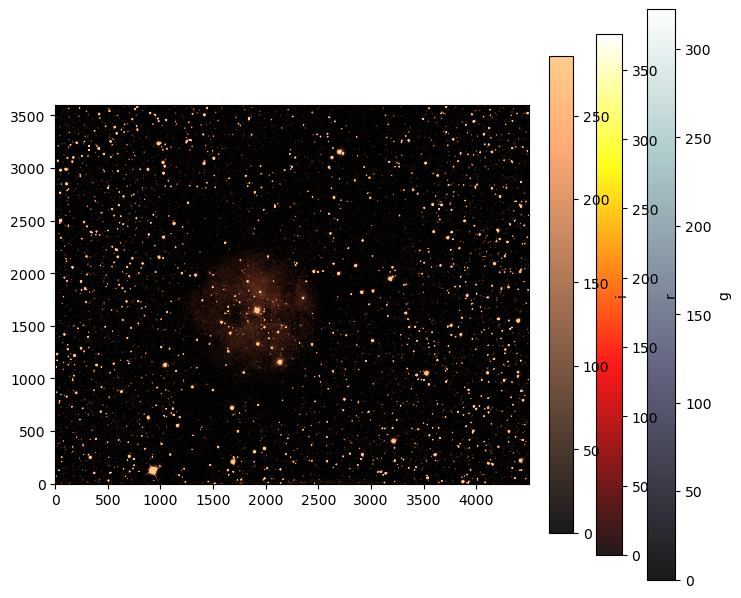

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(3):
    im1 = ax.imshow(filters[i], clim=[0,np.quantile(filters[i], [0.99])], cmap=cmaps[i], origin='lower', alpha=0.9, aspect='equal')
    # Add a single colorbar for each image
    cbar1 = plt.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)
    cbar1.set_label(title[i])

# Show the plot
plt.show()